<a href="https://colab.research.google.com/github/maguid28/CS6271-EvolutionaryComputation/blob/main/Week04Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Student Number: 23222425

#Student Name: Daniel Maguire

##Comments:



The best individual found was using:

P_CROSSOVER=0.5, P_MUTATION=0.005

Best Individual Overall =  1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1

Fitness of Best Individual Overall =  199.0

Total Weight for the Best Individual Overall:  993

   # 0-1 Knapsack Problem

In [1156]:
!pip install deap

Import the DEAP tools and useful libraries (random and matplotlib).

In [1157]:
from deap import base
from deap import creator
from deap import tools

import random

import matplotlib.pyplot as plt

In [1158]:
NBR_ITEMS = 100
MAX_WEIGHT = 1000

# set the random seed. Make sure you do this BEFORE creating the knapsack
# creating the knapsack
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

# Create the item dictionary: item name is an integer, and value is
# a (value, weight) 2-uple.

items = {}

# Create random items and store them in the items' dictionary.
for i in range(NBR_ITEMS):
     items[i] = (random.randint(1, 10), random.randint(1, 100))

In [1159]:
# Genetic Algorithm constants:
# DO NOT TOUCH
POPULATION_SIZE = 500

P_CROSSOVER = 0.7  # probability for crossover
P_MUTATION = 1/NBR_ITEMS   # probability for mutating an individual
MAX_GENERATIONS = 10000

In [1291]:
penalty_weight = 2

toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)
#creator.create("Individual", array.array, typecode='b', fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, NBR_ITEMS)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# knapsack fittness function
def knapsackFitness(individual):
    total_weight = 0.0
    total_value = 0.0
    for (selected, (item_value, item_weight)) in zip(individual, items.values()):
        if selected:
            total_weight += item_weight
            total_value += item_value

    if total_weight > MAX_WEIGHT:
        penalty = penalty_weight*(total_weight - MAX_WEIGHT)
        total_value -= penalty
    return total_value,

toolbox.register("evaluate", knapsackFitness)

# genetic operators:

# Tournament selection with tournament size of 2:
toolbox.register("select", tools.selTournament, tournsize=2)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/NBR_ITEMS)



GA

In [1161]:
def genetic_algorithm(P_CROSSOVER=0.7, P_MUTATION=0.1,penalty_weight=1):

  previousBestFitness = 0
  stagnantGenerations = 0

  best_individual_overall = None
  best_fitness_overall = 0
  best_weight_overall = 0

  # create initial population (generation 0):
  population = toolbox.populationCreator(n=POPULATION_SIZE)
  generationCounter = 0

  # calculate fitness tuple for each individual in the population:
  fitnessValues = list(map(toolbox.evaluate, population))
  for individual, fitnessValue in zip(population, fitnessValues):
      individual.fitness.values = fitnessValue

  # extract fitness values from all individuals in population:
  fitnessValues = [individual.fitness.values[0] for individual in population]

  # initialize statistics accumulators:
  maxFitnessValues = []
  meanFitnessValues = []

  # main evolutionary loop:
  # stop if max fitness value reached the known max value
  # OR if number of generations exceeded the preset value:
  while max(fitnessValues) < NBR_ITEMS and generationCounter < MAX_GENERATIONS:
      # update counter:
      generationCounter = generationCounter + 1

      # apply the selection operator, to select the next generation's individuals:
      offspring = toolbox.select(population, len(population))
      # clone the selected individuals:
      offspring = list(map(toolbox.clone, offspring))

      # apply the crossover operator to pairs of offspring:
      for child1, child2 in zip(offspring[::2], offspring[1::2]):
          if random.random() < P_CROSSOVER:
              toolbox.mate(child1, child2)
              del child1.fitness.values
              del child2.fitness.values

      for mutant in offspring:
          if random.random() < P_MUTATION:
              toolbox.mutate(mutant)
              del mutant.fitness.values

      # calculate fitness for the individuals with no previous calculated fitness value:
      freshIndividuals = [ind for ind in offspring if not ind.fitness.valid]
      freshFitnessValues = list(map(toolbox.evaluate, freshIndividuals))
      for individual, fitnessValue in zip(freshIndividuals, freshFitnessValues):
          individual.fitness.values = fitnessValue

      # replace the current population with the offspring:
      population[:] = offspring

      # collect fitnessValues into a list, update statistics and print:
      fitnessValues = [ind.fitness.values[0] for ind in population]


      maxFitness = max(fitnessValues)
      meanFitness = sum(fitnessValues) / len(population)
      maxFitnessValues.append(maxFitness)
      meanFitnessValues.append(meanFitness)
      #print("- Generation {}: Max Fitness = {}, Avg Fitness = {}".format(generationCounter, maxFitness, meanFitness))

      best_index = fitnessValues.index(max(fitnessValues))
      #print("Best Individual = ", *population[best_index])

      best_individual = population[best_index]
      best_individual_weight = sum(item_weight for selected, (_, item_weight) in zip(best_individual, items.values()) if selected)

      if maxFitness > best_fitness_overall:
        best_fitness_overall = maxFitness
        best_individual_overall = population[best_index]
        best_weight_overall = best_individual_weight

      best_weight = sum(item[1] for i, item in enumerate(items.values()) if best_individual[i] == 1)
      #print("Total weight for the best individual: " + str(best_weight) +  "\n")

      if best_individual_weight > MAX_WEIGHT:
            penalty_weight *= 1.1

      #stagnation check
      if previousBestFitness == maxFitness:
          stagnantGenerations += 1
      else:
          #reset if there's improvement
          stagnantGenerations = 0
      previousBestFitness = maxFitness
      if stagnantGenerations >= 25:
          print("No improvement in the last 25 generations")
          break

  print("Best Individual Overall = ", *best_individual_overall)
  print("Fitness of Best Individual Overall = ", best_fitness_overall)
  print("Total Weight for the Best Individual Overall: ", best_weight_overall)

  return maxFitnessValues, meanFitnessValues




#Evaluation


Best Individual Overall =  1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1
Fitness of Best Individual Overall =  178.0
Total Weight for the Best Individual Overall:  930


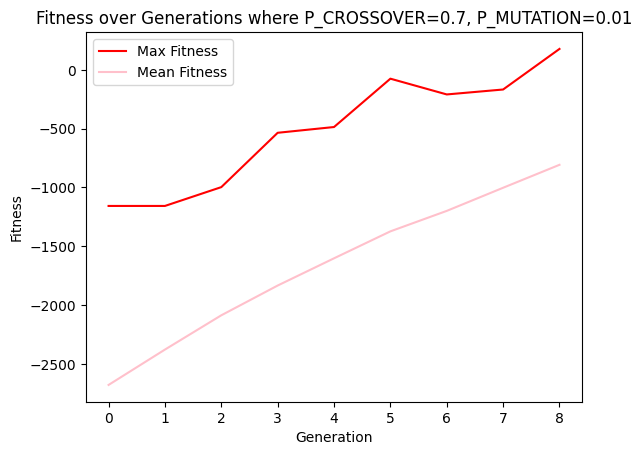

In [1162]:
max_vals_1, mean_vals_1 = genetic_algorithm(P_CROSSOVER=0.7, P_MUTATION=0.01, penalty_weight=6)

plt.plot(max_vals_1, color='red', label='Max Fitness')
plt.plot(mean_vals_1, color='pink', label='Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations where P_CROSSOVER=0.7, P_MUTATION=0.01')
plt.legend()
plt.show()


Best Individual Overall =  1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 1 1 0 1 0 1 0
Fitness of Best Individual Overall =  175.0
Total Weight for the Best Individual Overall:  996


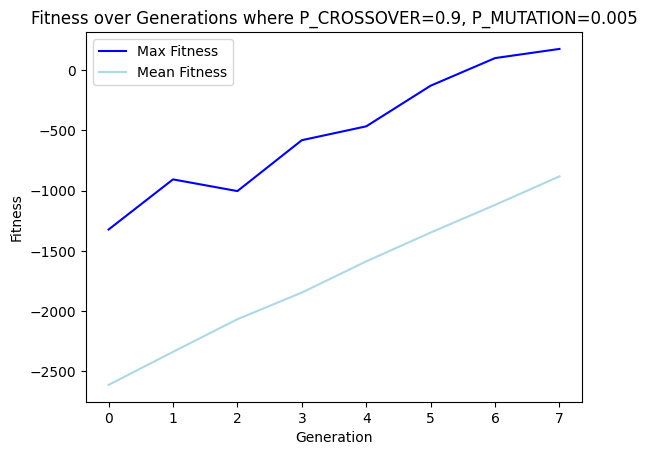

In [1214]:
max_vals_2, mean_vals_2 = genetic_algorithm(P_CROSSOVER=0.9, P_MUTATION=0.005)

plt.plot(max_vals_2, color='blue', label='Max Fitness')
plt.plot(mean_vals_2, color='lightblue', label='Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations where P_CROSSOVER=0.9, P_MUTATION=0.005')
plt.legend()
plt.show()


Best Individual Overall =  1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 0 1 0 1 1
Fitness of Best Individual Overall =  199.0
Total Weight for the Best Individual Overall:  993


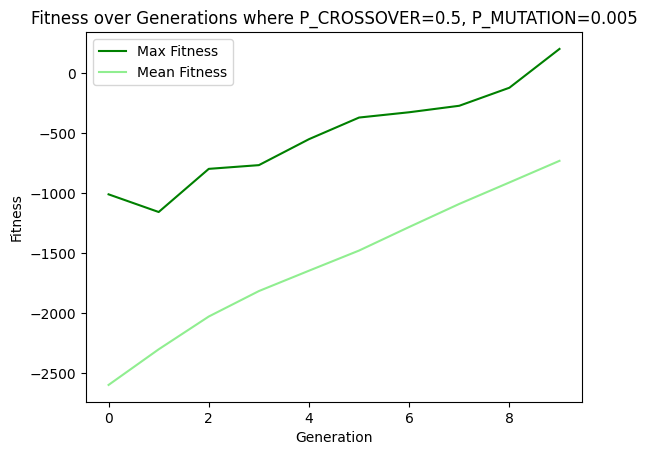

In [1290]:
max_vals_3, mean_vals_3 = genetic_algorithm(P_CROSSOVER=0.5, P_MUTATION=0.005)

plt.plot(max_vals_3, color='green', label='Max Fitness')
plt.plot(mean_vals_3, color='lightgreen', label='Mean Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Fitness over Generations where P_CROSSOVER=0.5, P_MUTATION=0.005')
plt.legend()
plt.show()